In [1]:
import os
import csv
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten,Dense,Lambda,Convolution2D,MaxPooling2D, Cropping2D

Using TensorFlow backend.


In [4]:
print("Running...")    
lines = []
filepath=".././testLap1/"

with open('.././testLap1/driving_log.csv') as cfile:
          reader = csv.reader(cfile)
          for line in reader:
              lines.append(line)

images=[]
measurements=[]
#images_center=[]
#images_left=[]
#images_right=[]
#measurements_center=[]
#measurements_left=[]
#measurements_right=[]


'''
Reminder!

mpimg.imread reads in images in RGB format
cv2.imread reads in images in BGR format
Please note the difference when using the drive.py file 
'''

for x in lines:
    if (x[3]!="0"):
        image_path=x[0]
        image=cv2.imread(image_path,cv2.IMREAD_COLOR)
        images.append(image)
        measurements.append(float(x[3]))
    else:
        pass

for x in lines:
    if (x[3]!="0"):
        image_path=x[1]
        image=cv2.imread(image_path,cv2.IMREAD_COLOR)
        images.append(image)
        measurements.append(float(x[3]))
    else:
        pass


for x in lines:
    if (x[3]!="0"):
        image_path=x[2]
        image=cv2.imread(image_path,cv2.IMREAD_COLOR)
        images.append(image)
        measurements.append(float(x[3]))
    else:
        pass


    """
for x in lines:
    imagepath=x[1]
    image=cv2.imread(image_path,cv2.IMREAD_COLOR)
    #image2=mpimg.imread(image_path)
    images.append(image)
    #images2.append(image2)
    measurements.append(float(line[3]))
    
for x in lines:
    imagepath=x[2]
    image=cv2.imread(image_path,cv2.IMREAD_COLOR)
    #image2=mpimg.imread(image_path)
    images.append(image)
    #images2.append(image2)
    measurements.append(float(line[3]))    
"""

print("Images Completed...")
    
    
print("Images:")
print(len(images))
print("Measurements:")
print(len(measurements))
#print(images[0].shape)

Running...
Images Completed...
Images:
5736
Measurements:
5736


5736
(160, 320, 3)


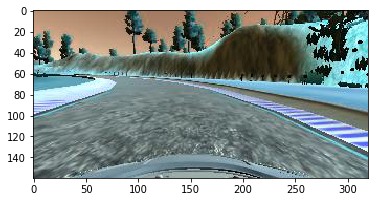

-0.15


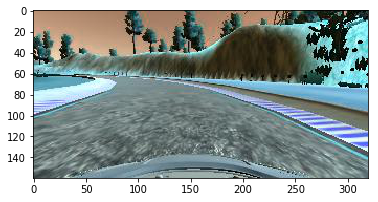

-0.3


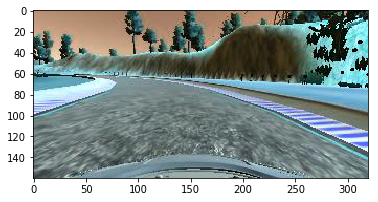

-0.15


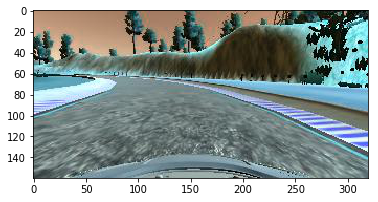

-0.3


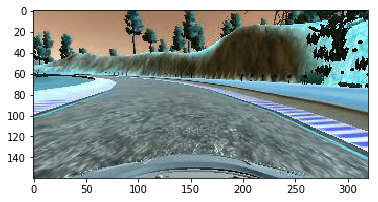

-0.5000001


In [5]:
#Visualize data

count=5

print(len(images))
#print(len(images2))
print(images[count].shape)
#print(images2[0].shape)

for x in range(0,count):
    plt.imshow(images[x])
    plt.show()
    print(measurements[x])

In [6]:
x_train = np.array(images)
y_train = np.array(measurements)

print(x_train.shape)
print(y_train.shape)

(5736, 160, 320, 3)
(5736,)


In [8]:
model=Sequential()

#Preprocessing: Lambda Layer to normalize(/255) and mean-center(-0.5) the data
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))


#Preprocessing:Cropping the image to reduce size and irrelevant features
model.add(Cropping2D(cropping=((74,20),(80,80))))

#NVidia Model
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Convolution2D(64,1,8,activation="relu"))
model.add(Flatten())
model.add(Dense(1164))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
model.fit(x_train,y_train,validation_split=0.01,shuffle=True,nb_epoch=5)
model.summary()
model.save('model.h5')

Train on 5678 samples, validate on 58 samples
Epoch 1/5
5678/5678 [==============================] - 43s - loss: 0.0866 - val_loss: 0.1365